# Stock market forecasting using Time Series analysis

SNagesh Singh Chauhan. Nov 26, 2019. [Here](https://towardsdatascience.com/stock-market-forecasting-using-time-series-c3d21f2dd37f). [Github Code](https://github.com/nageshsinghc4/stock-market-forecasting)

“`The stock market is designed to transfer money from the active to the patient`.” ― **Warren Buffett**

The general research associated with the stock or share market is highly focusing on neither buy nor sell but it fails to address the dimensionality and expectancy of a new investor. The common trend towards the stock market among the society is that it is highly risky for investment or not suitable for trade so most of the people are not even interested. The seasonal variance and steady flow of any index will help both existing and naïve investors to understand and make a decision to invest in the stock/share market.

To solve these types of problems, the time series analysis will be the best tool for forecasting the trend or even future. The trend chart will provide adequate guidance for the investor.

So let us understand this concept in great detail and use a machine learning technique to forecast stocks.


## Stock market

*A stock or share (also known as a company’s “equity”) is a financial instrument that represents ownership in a company or corporation and represents a proportionate claim on its assets (what it owns) and earnings (what it generates in profits)*. — **Investopedia**

The stock market is a market that enables the seamless exchange of buying and selling of company stocks. Every Stock Exchange has its own `Stock Index value`. The **index is the average value that is calculated by combining several stocks**. This helps in representing the entire stock market and predicting the market’s movement over time. The stock market can have a huge impact on people and the country’s economy as a whole. Therefore, **predicting the stock trends in an efficient manner can minimize the risk of loss and maximize profit**.

### How does stock market work?


The concept behind how the stock market works is pretty simple. Operating much like an auction house, the stock market enables buyers and sellers to negotiate prices and make trades.

The stock market works through a network of exchanges — you may have heard of the New York Stock Exchange, Nasdaq or Sensex. Companies list shares of their stock on an exchange through a process called an `Initial Public Offering` or [IPO](https://www.nerdwallet.com/blog/investing/everything-need-know-investing-ipos/). Investors purchase those shares, which allows the company to raise money to grow its business. Investors can then buy and sell these stocks among themselves, and the exchange tracks the supply and demand of each listed stock.

That supply and demand help determine the price for each security or the levels at which stock market participants — investors and traders — are willing to buy or sell.

### How Share Prices Are Set

To actually buy shares of a stock on a stock exchange, investors go through brokers — an intermediary trained in the science of stock trading, who can get an investor a stock at a fair price, at a moment’s notice. Investors simply let their broker know what stock they want, how many shares they want, and usually at a general price range. That’s called a “bid” and sets the stage for the execution of a trade. If an investor wants to sell shares of a stock, they tell their broker what stock to sell, how many shares, and at what price level. That process is called an “offer” or “ask price.”

Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction — **physical** factors vs. **physiological**, **rational** and **irrational** behavior, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy.


## Machine learning in stock market

Stock and financial markets tend to be unpredictable and even illogical, just like the outcome of the Brexit vote or the last US elections. Due to these characteristics, financial data should be necessarily possessing a rather turbulent structure which often makes it hard to find reliable patterns. **Modeling turbulent structures** requires machine learning algorithms capable of finding hidden structures within the data and predict how they will affect them in the future. The most efficient methodology to achieve this is Machine Learning and Deep Learning. Deep learning can deal with complex structures easily and extract relationships that further increase the accuracy of the generated results.

Machine learning has the potential to ease the whole process by analyzing large chunks of data, spotting significant patterns and generating a single output that navigates traders towards a particular decision based on predicted asset prices.

Stock prices are not randomly generated values instead they can be treated as a discrete-time series model which is based on a set of well-defined numerical data items collected at successive points at regular intervals of time. Since it is essential to identify a model to analyze trends of stock prices with adequate information for decision making, it recommends that transforming the time series using ARIMA is a better algorithmic approach than forecasting directly, as it gives more authentic and reliable results.

`Autoregressive Integrated Moving Average` (ARIMA) **Model converts non-stationary data to stationary data before working on it. It is one of the most popular models to predict linear time series data**.

ARIMA model has been used extensively in the field of finance and economics as it is known to be robust, efficient and has a strong potential for short-term share market prediction.

## Implementing stock price forecasting

The dataset consists of stock market data and it can be downloaded from [here]( https://github.com/nageshsinghc4/stock-market-forecasting).

The dataset consists of stock market data of Altaba Inc. and it can be downloaded from here.
The data shows the stock price of Altaba Inc from `1996–04–12` till `2017–11–10`. The goal is to train an ARIMA model with optimal parameters that will forecast the closing price of the stocks on the test data.

If you want to understand more on time series analysis I would recommend you to go through this article to have a better understanding of how Time Series analysis works.

So start with loading all the required libraries:



In [3]:
# conda install -c alkaline-ml pmdarima 
# restar computer after install

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 10, 6

In [6]:
# load data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

data = pd.read_csv('.\\data\StockMarkForecast.SNagesh.data.csv', 
                   sep=',', 
                   index_col='Date', 
                   parse_dates=['Date'], 
                   date_parser=dateparse).fillna(0)

data.head(5)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1996-04-12,1.05,1.79,1.02,1.38,408720000,0
1996-04-15,1.49,1.50,1.25,1.34,79231200,0
1996-04-16,1.34,1.34,1.17,1.20,48026400,0
1996-04-17,1.18,1.18,1.03,1.12,42871200,0
1996-04-18,1.25,1.25,1.17,1.22,27352800,0


Visualize the per day closing price of the stock.

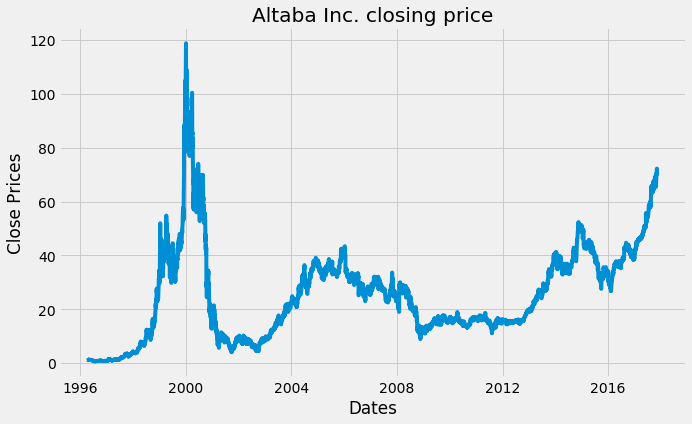

In [11]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.title('Altaba Inc. closing price')

plt.plot(data['Close'])

plt.show()

Lets us plot the scatterplot:

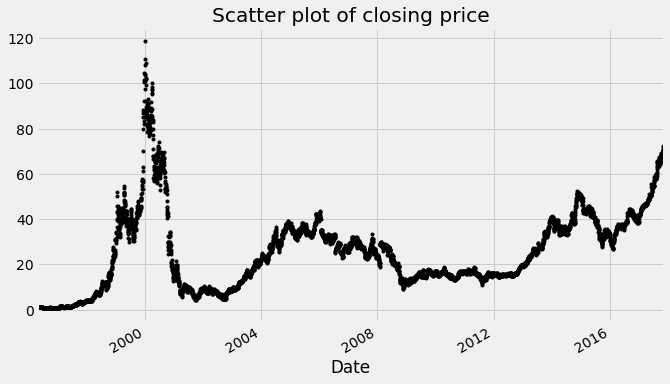

In [12]:
# scatter plot of the sales
df_close = data['Close']
df_close.plot(style='k.')

plt.title('Scatter plot of closing price')
plt.show()

We can also visualize the data in our series through a probability distribution too.

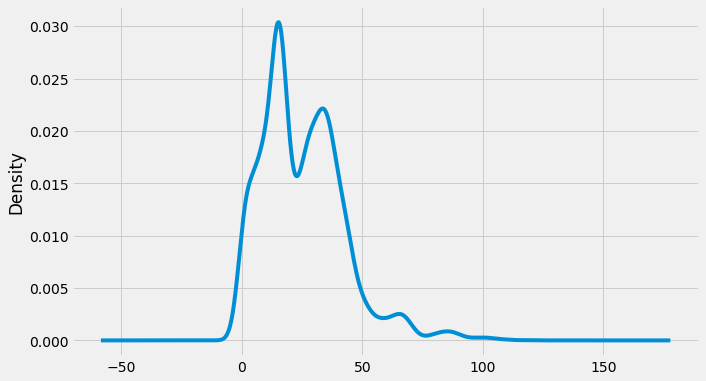

In [13]:
# Distribution of the dataset
df_close.plot(kind='kde')

Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:
- `Level`: The average value in the series.
- `Trend`: The increasing or decreasing value in the series.
- `Seasonality`: The repeating short-term cycle in the series.
- `Noise`: The random variation in the series.

First, we need to check if a series is `stationary` or `not` **because time series analysis only works with STATIONARY DATA**.

### ADF (Augmented Dickey-Fuller) Test

The `Dickey-Fuller` test is one of the most popular statistical tests. **It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not**. The null and alternate hypothesis of this test is:

- **Null Hypothesis**: The series has a unit root (value of a =1)
- **Alternate Hypothesis**: The series has no unit root.

If we `fail to reject the null hypothesis, we can say that the series is non-stationary`. This means that the series **can be linear** or **difference stationary**.

`If both 'mean' and 'standard deviation' are flat lines` **(constant mean and constant variance), the series becomes stationary**.

So let's check for stationarity:

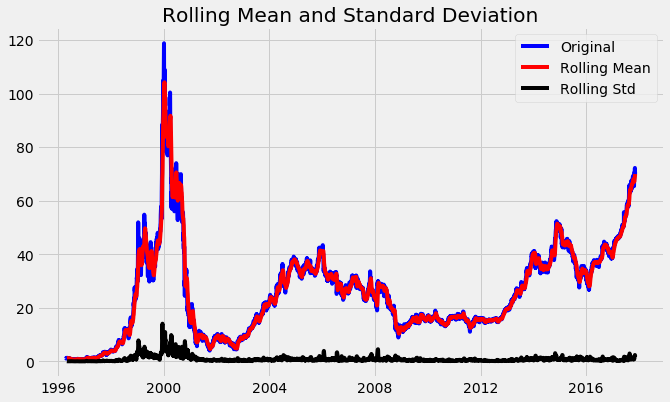

Results of dickey fuller test
Test Statistics                  -2.062280
p-value                           0.259950
No. of lags used                 32.000000
Number of observations used    5401.000000
critical value (1%)              -3.431561
critical value (5%)              -2.862075
critical value (10%)             -2.567055
dtype: float64


In [14]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

Through the above graph, we can see the increasing mean and standard deviation and hence **our series is not stationary**.

We see that the p-value is greater than 0.05 so we cannot reject the **Null hypothesis**. Also, the test statistics is greater than the critical values. **so the data is non-stationary**.

In order to `perform a time series analysis`, we may **need to separate 'seasonality' and 'trend' from our series. The resultant series will become 'stationary'** through this process.

So let us separate Trend and Seasonality from the time series.

<Figure size 720x432 with 0 Axes>

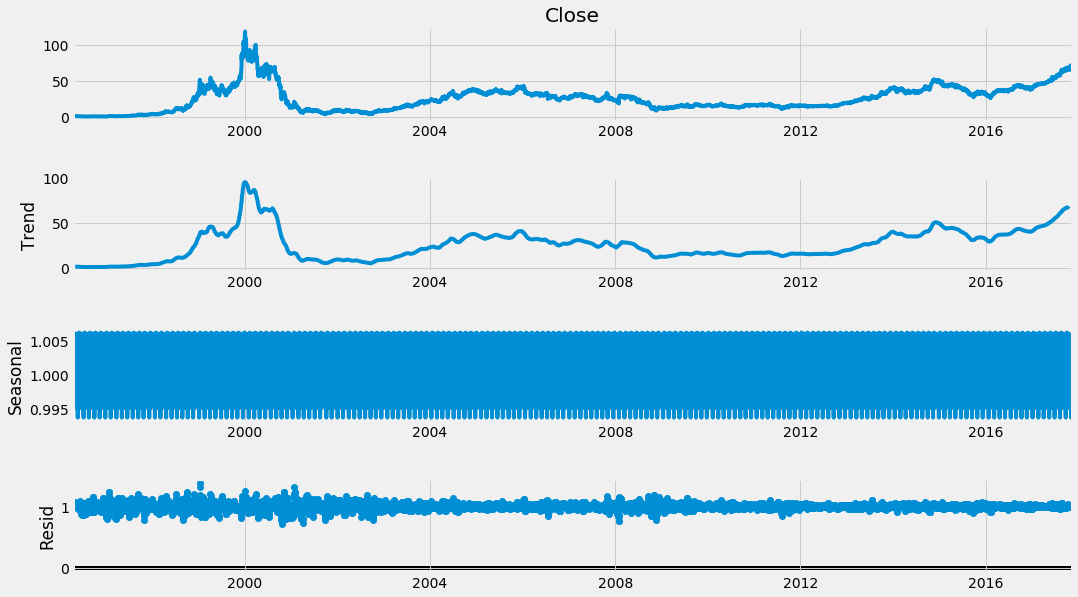

In [21]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A `rolling average` **is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series**.

No handles with labels found to put in legend.


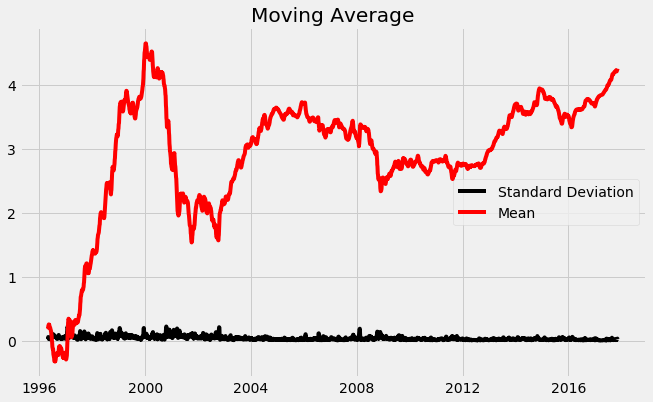

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

df_log = np.log(df_close)

moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Now we are going to create an ARIMA model and will train it with the closing price of the stock on the train data. So let us split the data into training and test set and visualize it.

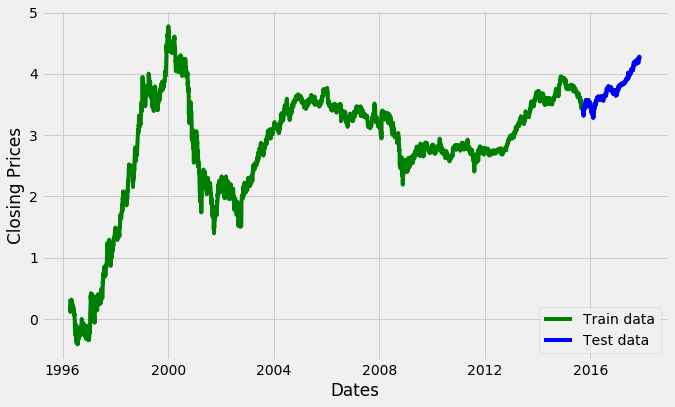

In [23]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Its time to choose parameters p,q,d for ARIMA model. Last time we chose the value of p,d, and q by observing the plots of ACF and PACF but now we are going to use Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.

#### Auto ARIMA: Automatically discover the optimal order for an ARIMA model.

The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. This function is based on the commonly-used R function, forecast::auto.arima.

The **auro_arima function works by conducting differencing tests** (i.e., `Kwiatkowski–Phillips–Schmidt–Shin`, `Augmented Dickey-Fuller` or `Phillips–Perron`) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

In [24]:
model_autoARIMA = auto_arima(train_data, 
                             start_p=0, 
                             start_q=0,
                             test='adf',       # use adftest to find optimal 'd'
                             max_p=3, 
                             max_q=3,          # maximum p and q
                             m=1,              # frequency of series
                             d=None,           # let model determine 'd'
                             seasonal=False,   # No Seasonality
                             start_P=0, 
                             D=0, 
                             trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-18377.184, BIC=-18364.196, Time=1.228 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-18375.274, BIC=-18355.791, Time=0.860 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-18375.280, BIC=-18355.798, Time=1.182 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-18377.513, BIC=-18371.019, Time=0.211 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-18378.090, BIC=-18352.114, Time=1.481 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-18386.172, BIC=-18353.702, Time=1.957 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-18386.124, BIC=-18360.147, Time=0.457 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-18384.395, BIC=-18345.431, Time=4.041 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-18384.593, BIC=-18345.628, Time=1.483 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (con

So the Auto ARIMA model provided the value of p,d, and q as SARIMAX(3, 1, 0) respectively.
Before moving forward, let’s review the residual plots from auto ARIMA.

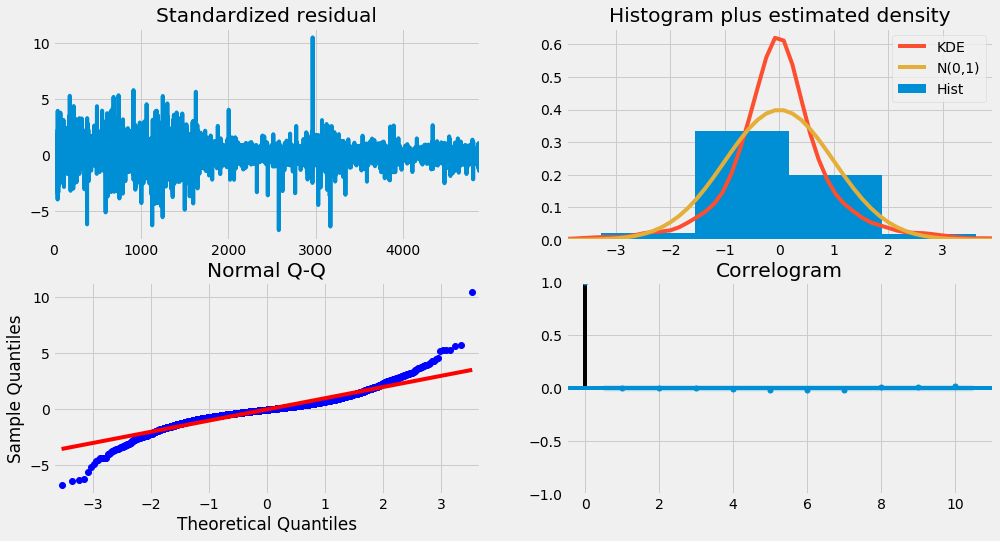

In [25]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

So how to interpret the plot diagnostics?

- **Top left**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
- **Top Right**: The density plot suggest normal distribution with mean zero.
- **Bottom left**: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.
- **Bottom Right**: The `Correlogram`, aka, `ACF` plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s start forecasting the stock prices.
Next, create an ARIMA model with provided optimal parameters p, d and q.

#### Sugested by the author

In [28]:
modelseg = ARIMA(train_data, order=(3, 1, 2))  
fittedseg = modelseg.fit(disp=-1)  
print(fittedseg.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4886
Model:                 ARIMA(3, 1, 2)   Log Likelihood                9204.201
Method:                       css-mle   S.D. of innovations              0.037
Date:                Sun, 08 Mar 2020   AIC                         -18394.402
Time:                        23:34:51   BIC                         -18348.943
Sample:                             1   HQIC                        -18378.450
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.001      1.292      0.196      -0.000       0.002
ar.L1.D.Close    -1.6322      0.017    -96.746      0.000      -1.665      -1.599
ar.L2.D.Close    -0.9840      0.025    -

Now let's start forecast the stock prices on the test dataset keeping 95% confidence level.

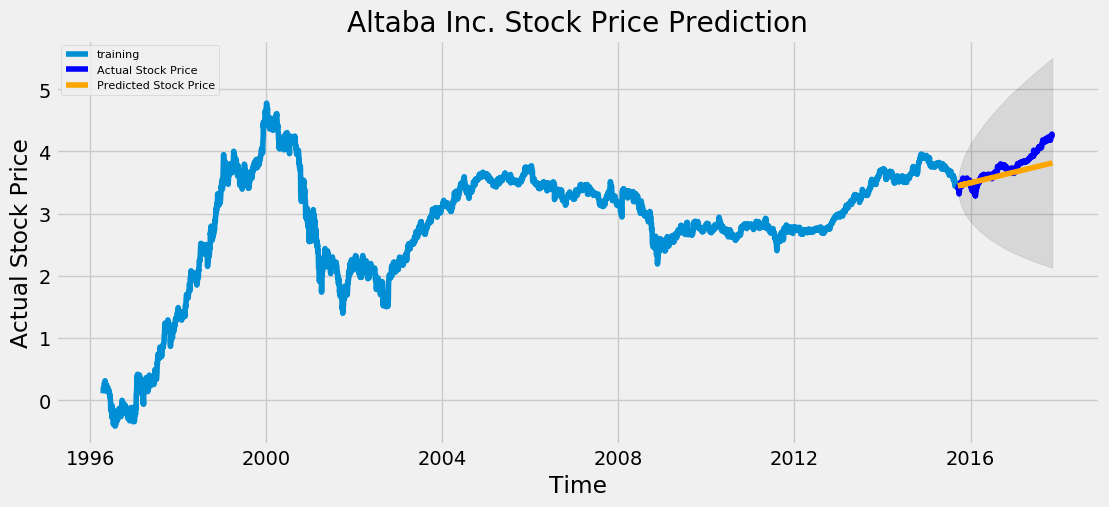

In [30]:
# Forecast
fc, se, conf = fittedseg.forecast(544, alpha=0.05)  # 95% confidence

fc_series = pd.Series(fc, index=test_data.index)

lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Obtained by the algorithm

In [29]:
modelobs = ARIMA(train_data, order=(3, 1, 0))  
fittedobs = modelobs.fit(disp=-1)  
print(fittedobs.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4886
Model:                 ARIMA(3, 1, 0)   Log Likelihood                9198.196
Method:                       css-mle   S.D. of innovations              0.037
Date:                Sun, 08 Mar 2020   AIC                         -18386.391
Time:                        23:34:57   BIC                         -18353.920
Sample:                             1   HQIC                        -18374.997
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.001      1.325      0.185      -0.000       0.002
ar.L1.D.Close     0.0056      0.014      0.392      0.695      -0.022       0.034
ar.L2.D.Close    -0.0514      0.014     

Now let's start forecast the stock prices on the test dataset keeping 95% confidence level.

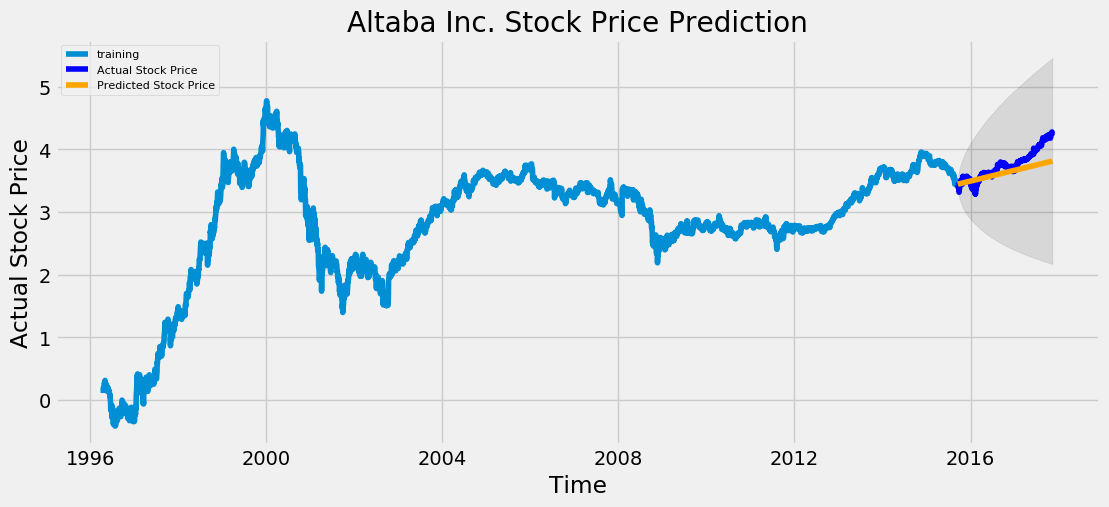

In [31]:
# Forecast
fc, se, conf = fittedobs.forecast(544, alpha=0.05)  # 95% confidence

fc_series = pd.Series(fc, index=test_data.index)

lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

As you can see our model did quite handsomely. Let us also check the commonly used accuracy metrics to judge forecast results:

In [32]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))

mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))

rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.033486887842325404
MAE: 0.1385320672685764
RMSE: 0.18299422898639564
MAPE: 0.03546286455484611


Around 3.5% **MAPE**([`Mean Absolute Percentage Error`](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)) implies the model is about 96.5% accurate in predicting the test set observations.